**MOVIE RATING PREDICTION**
* Created by - Shreyasi Mondal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


**ABOUT THE DATASET**

This dataset contains the name of the movie, year of release, duration of the movie, rating, director and the name of the actors.

In [ ]:
df=pd.read_csv('/content/drive/My Drive/IMDb Movies India.csv',encoding='latin-1')

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**Checking Null Values**

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].median(), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df['Director'].fillna(df['Director'].mode()[0], inplace=True)
df['Actor 1'].fillna(df['Actor 1'].mode()[0], inplace=True)
df['Actor 2'].fillna(df['Actor 2'].mode()[0], inplace=True)
df['Actor 3'].fillna(df['Actor 3'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

Name            0
Year        15509
Duration    15509
Genre           0
Rating          0
Votes           0
Director        0
Actor 1         0
Actor 2         0
Actor 3         0
dtype: int64

In [ ]:
df.drop(['Year', 'Duration'], axis=1,inplace=True)

In [ ]:
df

,Name,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Drama,5.841621,35.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,"Drama, Musical",5.841621,35.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,Drama,5.841621,35.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,Action,5.841621,35.0,Kiran Thej,Sangeeta Tiwari,Rekha,Pran
15507,Zulmi Shikari,Action,5.841621,35.0,Jayant Desai,Ashok Kumar,Rekha,Pran


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Genre     15509 non-null  object 
 2   Rating    15509 non-null  float64
 3   Votes     15509 non-null  float64
 4   Director  15509 non-null  object 
 5   Actor 1   15509 non-null  object 
 6   Actor 2   15509 non-null  object 
 7   Actor 3   15509 non-null  object 
dtypes: float64(2), object(6)
memory usage: 969.4+ KB


In [ ]:
df.describe()

,Rating,Votes
count,15509.000000,15509.000000
mean,5.841621,71.241989
std,0.987343,133.120371
min,1.100000,5.000000
25%,5.841621,35.000000
50%,5.841621,35.000000
75%,6.000000,35.000000
max,10.000000,999.000000


In [ ]:
# Selecting the numerical columns
num_columns=['Rating','Votes']

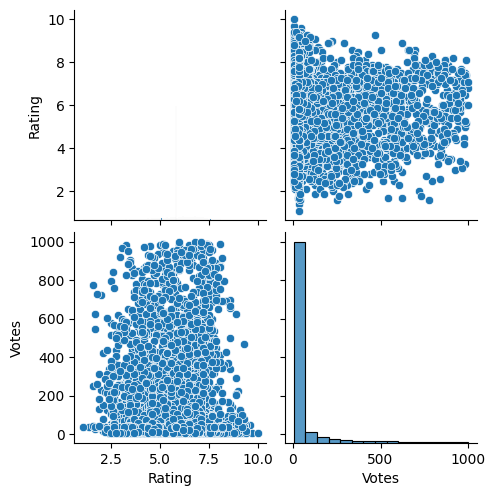

In [ ]:
import seaborn as sns
sns.pairplot(df[num_columns])
plt.show()

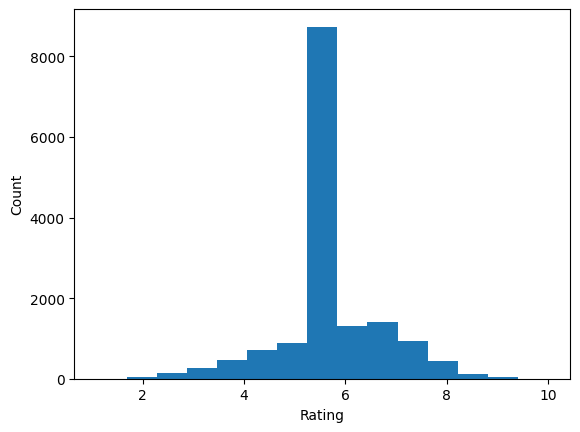

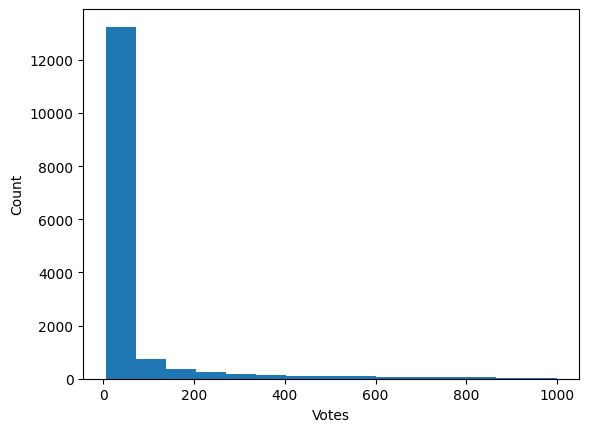

In [ ]:
#Plotting histograms for numerical columns
for column in num_columns:
    plt.hist(df[column], bins=15)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

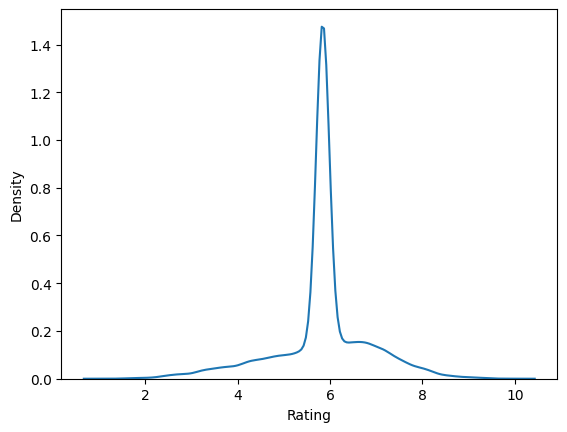

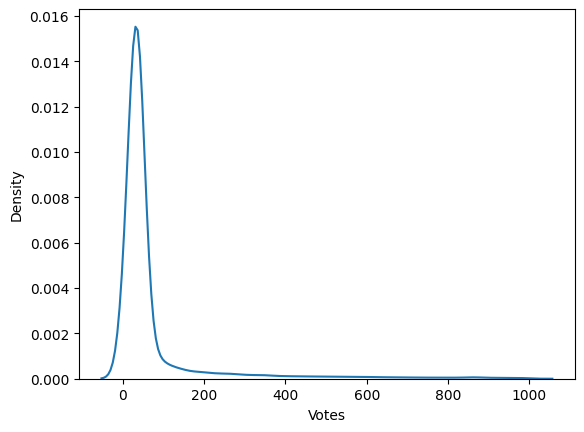

In [ ]:
#Plotting kernel density plots for numerical columns
for column in num_columns:
    sns.kdeplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [ ]:
#Selecting the categorical columns
cat_columns=['Genre','Director','Actor 1','Actor 2','Actor 3']

In [ ]:
# Display frequency tables showing counts and percentages
for column in cat_columns:
    print(df[column].value_counts())
    print(df[column].value_counts(normalize=True))
    print()

Genre
Drama                         4657
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64
Genre
Drama                         0.300277
Action                        0.083113
Thriller                      0.050229
Romance                       0.045651
Drama, Romance                0.033787
                                ...   
Action, Musical, War          0.000064
Horror, Crime, Thriller       0.000064
Animation, Comedy             0.000064
Romance, Action, Crime        0.000064
Adventure, Fantasy, Sci-Fi    0.000064
Name: proportion, Length: 485, dtype: float64

Director
Jayant Desai        583
Kanti Shah           57
Babubhai Mistry      50
Mahesh 

In [ ]:
#calculate coefficient correlation between numerical columns
df[num_columns].corr()

,Rating,Votes
Rating,1.000000,-0.029912
Votes,-0.029912,1.000000


In [ ]:
#Seperating the features X and y
X=df.drop('Rating',axis=1)
y=df['Rating']

In [ ]:
print("Features (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

Features (X) shape: (15509, 7)
Target variable (y) shape: (15509,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('categorical', categorical_pipeline, cat_columns)
    ])),
    ('model', model)
])

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict ratings
y_pred = pipeline.predict(X_test)


In [ ]:
#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.5436939866442475


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Initialize KNN Regressor with k=5 (you can adjust k as needed)
knn_regressor = KNeighborsRegressor(n_neighbors=5)


In [ ]:
# Create the pipeline for KNN
knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('categorical', categorical_pipeline, cat_columns)
    ])),
    ('model', knn_regressor)
])


In [ ]:
# Fit and predict with KNN
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE) for KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'KNN Mean Absolute Error (MAE): {mae_knn}')

KNN Mean Absolute Error (MAE): 0.6135351551480012


In [ ]:
# Define SVR
from sklearn.svm import SVR
svr_regressor = SVR(kernel='linear')

In [ ]:
#Create the pipeline for SVR
svr_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('categorical', categorical_pipeline, cat_columns)
    ])),
    ('model', svr_regressor)
])

In [ ]:
# Fit and predict with SVR
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)


In [ ]:
# Calculate Mean Absolute Error (MAE) for SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'SVR Mean Absolute Error (MAE): {mae_svr}')

SVR Mean Absolute Error (MAE): 0.6438933825614716


**Model Performance:** The Random Forest Regression model has the lowest MAE among the three models, indicating better performance in predicting movie ratings compared to KNN and SVR. This suggests that the Random Forest model's predictions are, on average, closer to the actual ratings.

**Algorithm Selection**: Random Forest Regression seems to be a suitable choice for this movie rating prediction task based on the provided MAE values. It's performing better than both KNN and SVR in terms of MAE.

In summary, based on the provided MAE values, the Random Forest Regression model appears to be the most effective among the models evaluated for predicting movie ratings